## A demonstration of Dimension Reduction via SVD

We illustrate using the SVD  of a grayscale image (treated as a matrix) to reduce the dimensions by choosing only the first $k$ singular values: this amounts to a *lossy image compression* technique.

In [83]:
import matplotlib.pyplot as plt
import matplotlib.image as image
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [61]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.144])

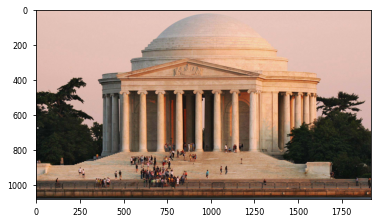

In [62]:
n_colors = 64

# Load the Jefferson Memorial image
memorial = image.imread("Jefferson-Memorial-Washington-DC.jpg")

plt.imshow(memorial)

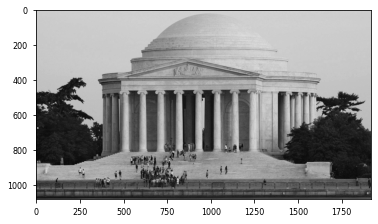

In [63]:
# Convert to floats instead of the default 8 bits integer coding. Dividing by
# 255 is important so that plt.imshow behaves works well on float data (need to
# be in the range [0-1]
memorial = np.array(memorial, dtype=np.float64) / 255
gr_memorial = rgb2gray(memorial)
plt.imshow(gr_memorial, cmap = plt.get_cmap('gray'))
plt.show()

In [64]:
gr_memorial.shape

(1080, 1920)

In [65]:
gr_cmap = plt.get_cmap('gray')

In [66]:
gr_memorial = np.matrix(gr_memorial)

In [67]:
u, sigma, vt = np.linalg.svd(gr_memorial)

In [68]:
np.linalg.matrix_rank(gr_memorial)

1080

In [69]:
sigma

array([8.42056951e+02, 1.57830182e+02, 1.11341176e+02, ...,
       1.37124624e-02, 1.26816158e-02, 1.17719462e-02])

In [70]:
sigma**2

array([7.09059909e+05, 2.49103665e+04, 1.23968574e+04, ...,
       1.88031624e-04, 1.60823379e-04, 1.38578716e-04])

In [71]:
def rank_k_approx(img, k):
    """Return a rank-k approximation
    
    img: an image (as a 2D grayscale array)
    k: number of singular vectors used
    """
    u, sigma, vt = np.linalg.svd(img)
    energy = np.sum(sigma**2)
    approx_energy = np.sum((sigma**2)[:k])
    percentage = approx_energy*100/energy
    print (f'Energy retained = {percentage:4.2f}%')
    return u[:,:k]*np.diag(sigma[:k])*vt[:k,:]

In [72]:
approx = rank_k_approx(gr_memorial, 10)

approx.shape

Energy retained = 98.56%


(1080, 1920)

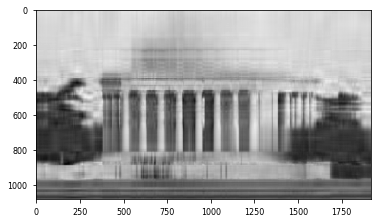

In [73]:
plt.imshow(approx, cmap = gr_cmap)
plt.show()

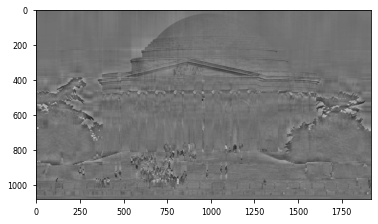

In [74]:
plt.imshow(gr_memorial - approx, cmap=gr_cmap)
plt.show()

## Linear Least Squares via SVD, Matrix Inversion, and Linear Regression Model

We wish to determine a column vector $X = [x_0, x_1, x_2]^T$ such that  
$$M X \approx b$$
where
$$M = 
\begin{bmatrix}
3 & -1 & 2 \\
-1 & -3 & 1 \\
1 & 2 & 1 \\
-2 & 1 & 3 
\end{bmatrix}
$$
and $b = [2, -4, 3, -3]^T$. The best approximation is the one that will **minimize the norm (length) of the error, i.e.,** minimize $|MX - b|$.

In [76]:
m = np.array([[3,-1,2], [-1,-3,1], [1,2,1], [-2,1,3]])
b = np.array([2, -4, 3, -3])

##### Solution for $X$ that involves computing the inverse of the matrix $M^T M$. 

In [77]:
mT = m.T
mT_m = np.matmul(mT, m)
mT_b = np.matmul(mT, b)

betas = np.matmul(np.linalg.inv(mT_m), mT_b)
print('Solution (column vector X):', betas)
error = b - m.dot(betas)
print('Norm:', np.nansum(np.square(error)))

print('\nSolution Validation:', np.linalg.lstsq(m,b)[0])
print('Norm Validation', np.linalg.lstsq(m,b)[1])

Solution (column vector X): [ 1.26666667  0.86666667 -0.4       ]
Norm: 0.26666666666666644

Solution Validation: [ 1.26666667  0.86666667 -0.4       ]
Norm Validation [0.26666667]


<ipython-input-77-ae96f9c16b3e>:10: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print('\nSolution Validation:', np.linalg.lstsq(m,b)[0])
<ipython-input-77-ae96f9c16b3e>:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  print('Norm Validation', np.linalg.lstsq(m,b)[1])


##### Solution for $X$ that involves **SVD** and the **Moore-Penrose inverse**.

In [78]:
a_plus = np.linalg.pinv(m)
betas = a_plus.dot(b)

print('Solution (column vector X):', betas)

Solution (column vector X): [ 1.26666667  0.86666667 -0.4       ]


##### Solution for $X$ that involves `sklearn`'s `LinearRegression` model (without intercepts!).

In [81]:
reg = LinearRegression(fit_intercept=False).fit(m, b)
betas = reg.coef_

print('Solution (column vector X):', betas)

Solution (column vector X): [ 1.26666667  0.86666667 -0.4       ]


## Another Example of Dimension Reduction via SVD

While conserving 95% of the energy.

In [84]:
f = pd.read_csv("anon_reviews.csv.zip")
f.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,name_0,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,name_0,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,name_0,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,name_0,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,name_1,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [85]:
%%time

ratings = f.pivot_table(index='review_profilename', columns='beer_style', values='review_overall', aggfunc='mean')

norm_ratings = ratings
norm_ratings = norm_ratings.sub(norm_ratings.mean(axis=1), axis=0)
norm_ratings = norm_ratings.fillna(0)
norm_ratings

CPU times: user 756 ms, sys: 102 ms, total: 858 ms
Wall time: 886 ms


beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profilename,,,,,,,,,,,,,,,,,,,,,
name_0,0.625405,-1.137853,0.216314,-0.283686,0.716314,0.000000,0.144886,0.216314,0.466314,0.287743,...,-0.212257,0.502028,0.316314,-0.083686,-0.213918,-0.408686,0.073457,0.000000,0.216314,-0.137853
name_1,-0.090455,-1.785260,0.061331,-0.876169,0.091222,0.023831,-0.090455,-0.222323,-0.876169,-0.141870,...,0.048831,-0.001169,0.290497,-0.026169,0.084148,0.123831,0.150147,-0.161884,0.008446,0.157164
name_10,-0.083151,-0.453455,-0.124731,-0.647254,-0.091698,-0.063921,-0.230587,-0.053921,0.186079,0.039615,...,0.112005,-0.063921,0.394413,0.049716,-0.019049,-0.425032,-0.275459,-0.063921,-0.011289,-0.073536
name_100,0.181978,-1.026355,-0.019002,-0.651355,0.241502,0.148645,0.048645,-0.044212,0.000000,0.362930,...,0.248645,-0.318022,0.098645,0.348645,0.166826,0.348645,0.348645,0.000000,-0.004297,0.056978
name_1000,0.000000,0.284091,0.000000,-0.028409,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.028409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_9995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.924242,0.000000,0.000000,0.000000
name_9996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
name_9997,1.111111,0.611111,0.111111,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.388889,...,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,-0.888889,0.000000,0.000000,0.111111


In [86]:
u, sigma, vt = np.linalg.svd(norm_ratings)

In [87]:
# Here we simply interate through possible k values (1-104 aka the number of columns).
# Since we start at 1, we break the loop when we find the first k that has at least 
# 95% energy, which sets k to the correct value.

for i in range(1,len(norm_ratings.columns)):
    k = i
    energy = np.sum(sigma**2)
    approx_energy = np.sum((sigma**2)[:k])
    
    if approx_energy*100/energy > 95:
        print(k)
        break

84


In [88]:
compressed_ratings = np.dot(np.dot(u[:,:k],np.diag(sigma[:k])),vt[:k,:])
compressed_ratings = pd.DataFrame(data=compressed_ratings, index=norm_ratings.index, columns=norm_ratings.columns)
compressed_ratings

beer_style,Altbier,American Adjunct Lager,American Amber / Red Ale,American Amber / Red Lager,American Barleywine,American Black Ale,American Blonde Ale,American Brown Ale,American Dark Wheat Ale,American Double / Imperial IPA,...,Scotch Ale / Wee Heavy,Scottish Ale,Scottish Gruit / Ancient Herbed Ale,Smoked Beer,Tripel,Vienna Lager,Weizenbock,Wheatwine,Winter Warmer,Witbier
review_profilename,,,,,,,,,,,,,,,,,,,,,
name_0,0.618164,-1.131407,0.219175,-0.278432,0.714872,-0.012159,0.145074,0.223546,-0.070158,0.298911,...,-0.242472,0.541125,0.115839,0.206925,-0.218710,-0.469678,0.010583,0.176683,0.239019,-0.120056
name_1,-0.104301,-1.788222,0.067081,-0.883171,0.076397,0.022236,-0.079418,-0.228779,-0.017895,-0.140962,...,0.051777,-0.001578,0.028049,0.128027,0.099340,0.130601,0.159687,-0.056685,0.016771,0.162320
name_10,-0.096102,-0.440750,-0.102480,-0.628712,-0.093243,-0.078545,-0.217543,-0.030833,-0.042314,0.064006,...,0.107535,-0.038993,0.114296,0.348094,-0.011328,-0.431225,-0.257540,0.068588,0.022500,-0.047440
name_100,0.176110,-1.046370,-0.026968,-0.684296,0.244571,0.101427,0.029891,-0.053509,-0.070450,0.341265,...,0.207483,-0.288817,-0.094638,0.125582,0.147875,0.357354,0.216745,0.111941,-0.012758,0.037851
name_1000,-0.001569,0.283734,0.000271,-0.027708,-0.000655,-0.001831,0.002302,-0.000417,0.020761,0.000205,...,0.000551,0.000680,0.013856,0.008488,0.000302,0.000725,0.000512,-0.023496,-0.000530,-0.027999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
name_9995,-0.000916,-0.001351,-0.001228,-0.002768,0.000073,-0.001759,-0.001631,-0.001943,-0.000069,-0.002017,...,-0.003031,-0.000610,0.002366,-0.014841,-0.001339,-0.001322,0.915517,0.006019,-0.001123,-0.001480
name_9996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
name_9997,1.115311,0.613262,0.111734,0.003832,0.002211,0.009398,-0.002911,0.002932,0.028172,-0.386527,...,0.002953,-0.004068,0.042603,0.034892,0.110569,-0.005059,-0.871661,0.001320,-0.000699,0.112941


In [91]:
diff = compressed_ratings - norm_ratings

#Small errors!
diff.mean()

beer_style
Altbier                      -5.322595e-05
American Adjunct Lager       -2.864318e-05
American Amber / Red Ale     -4.601578e-06
American Amber / Red Lager   -4.280303e-05
American Barleywine           4.401989e-07
                                  ...     
Vienna Lager                 -1.464522e-05
Weizenbock                   -2.839414e-05
Wheatwine                     7.548088e-04
Winter Warmer                -4.133286e-05
Witbier                      -5.900845e-06
Length: 104, dtype: float64